# Image Processing SS 2022 - Assignment - 01

### Deadline is 28.04.2022 at 12:00 p.m.

Please solve the assignments together with a partner. Write the names of yourself and your partner and a link to your repository in a text-submission in the Whiteboard. You have to do this EVERY WEEK.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Authors : Viktoriya, Thomas

## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSoSe22/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

In [98]:
# display the plots inside the notebook
%matplotlib inline

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [100]:
from skimage.data import astronaut

In [101]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [102]:
img = img / 255.

Lets display the image.

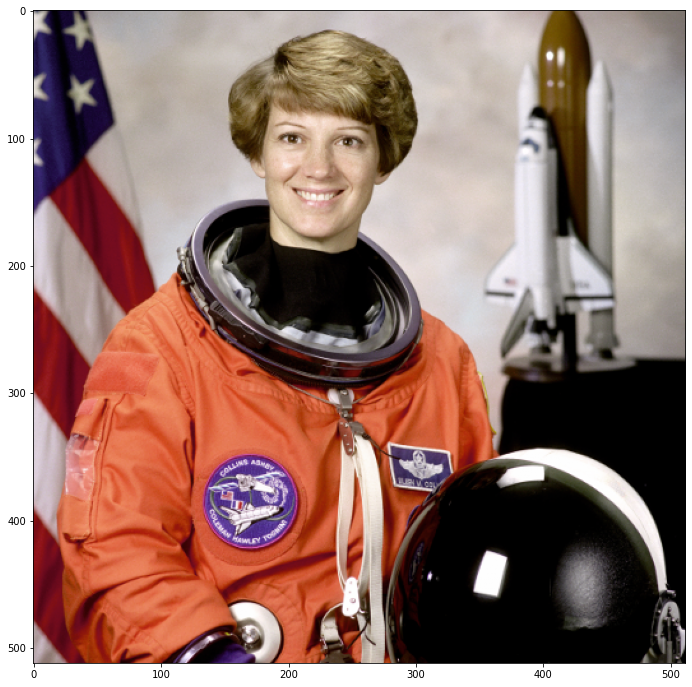

In [103]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [3 Points]

Plot the R, G and B channels separately.

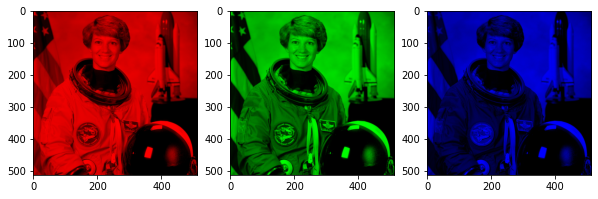

In [104]:
# Your code here
red_channel = img.copy()
red_channel[:,:,1:3] = 0
green_channel = img.copy()
green_channel[:,:,0] = 0
green_channel[:,:,2] = 0
blue_channel = img.copy()
blue_channel[:,:,0:2] = 0

fig = plt.figure(figsize=(10, 10))
w = 10
h = 10
rows = 1
columns = 3
images = [red_channel,green_channel,blue_channel]
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])

## Exercise 2 - XYZ to xy [3 Points]

Implement the `XYZ_to_xy` function where x and y indicate the chromaticity of a color. x shall be calculated as X / (X+Y+Z) and y as Y / (X+Y+Z).


In [105]:
def XYZ_to_xy(x):
    """
    Converts the numpy array `x` from XYZ to xy.
    """
    np.seterr(invalid='ignore')
    if x.shape[2]!=3:
        print("Sorry sizes don't match")
        return None
    new_array = np.zeros((x.shape[0],x.shape[1],2))
    new_array[:,:,0] = x[:,:,0] / (x[:,:,0] + x[:,:,1] + x[:,:,2])
    new_array[:,:,1] = x[:,:,1] / (x[:,:,0] + x[:,:,1] + x[:,:,2])
    return new_array

Plot the image and its new x and y components.

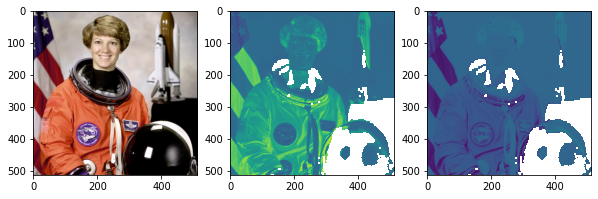

In [106]:
img_as_xy = XYZ_to_xy(img)
np.seterr(invalid='ignore')
#components plot
fig = plt.figure(figsize=(10, 10))
w = 10
h = 10
rows = 1
columns = 3
images = [img,img_as_xy[:,:,0],img_as_xy[:,:,1]]
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])

## Exercise 3 - Calculation [3 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?


I think we just have just calculate them using the matrix from the lecture : 


In [107]:
#not equal for the adobe one
T_lecture = np.array([
    [0.49,0.31,0.20],
    [0.17697,0.81240,0.01063],
    [0.00,0.01,0.99]
])

#source for adobe rgb matrix : http://www.brucelindbloom.com/index.html?Eqn_RGB_to_XYZ.html
T_adobe = np.array([
    [0.6097,0.2052,0.14922],
    [0.31112,0.62565,0.06321],
    [0.01948,0.06089,0.744]
])

#T = (1/(0.17697)) * T


color_rgb_1 = np.array([0,0.5,0.5])
color_rgb_2 = np.array([0.33,0.33,0.33])


#sample 1 
color_xyz_1 =  np.dot(T_adobe,color_rgb_1)
#sample 2
color_xyz_2 =  np.dot(T_adobe,color_rgb_2)

In [108]:
color_xyz_1 

array([0.17721 , 0.34443 , 0.402445])

In [109]:
color_xyz_2

array([0.3181596, 0.3299934, 0.2720421])

The light from the sodium lamp will be something between orange and yellow. To be exact, I will include a sector of the CIE-XYZ color sector that I assume is seen.

![image](sodium-lamp.png)

Our approximation for this RGB color will be : (250,159,46) (eye and color picker)

The mercury lamp will be a magneta color, because of the sector of the spectral line at which the electromagnetic waves's length is. Once more i will attach a photo

Because of the limitations of the RGB plane, we just have to take the point, which is closest to the the gamut, which we discussed in the lecture.It is obvious that y = 0 for the magneta color.

Magneta is represented in RGB in our opinion as : (255,0,255). (eye and color picker)


![image](mercury-lamp.png)

We did approximate the xyz values with the help of the following diagram for the following calculations: 

![image](spectral-sensitivity.png)


If we want to do exact calculation, we are going to take approximation of our color x,y,z values from the previous graph and calculate the values : 

In [110]:
T = np.array([
    [0.41847,-0.15866,-0.082835],
    [-0.091169,0.25243,0.015708],
    [0.00092090,-0.0025498,0.17860]
])

color_xyz_1 = np.array([0.4,0.05,1.6])
color_xyz_2 = np.array([1.3,1.2,0.1])


#magneta color
color_rgb_1 =  np.matmul(T,color_xyz_1)
#orange color
color_rgb_2 =  np.matmul(T,color_xyz_2)


In [111]:
def f(x):
    return int(255*x)

#magneta
color_rgb = np.array(list(map(f,color_rgb_1)))
color_rgb

array([ 6,  0, 72])

In [112]:
#orange
list(map(f,color_rgb_2))

[88, 47, 4]

However the values provided in the lecure deliver some suspicious results, that's why we researched and apply another formula : 
http://www.brucelindbloom.com/index.html?Eqn_RGB_to_XYZ.html

In [113]:
import math
T = np.array([
    [3.1338, -1.6161, -0.4906],
    [-0.978768, 1.91614,0.03345],
    [0.007194, -0.22899, 1.40524],
],dtype=np.float64)


color_xyz_1 = np.array([0.1,0.02,0.8])
color_xyz_2 = np.array([0.5,0.4,0.01])


#magneta color
color_rgb_1 =  np.dot(T,color_xyz_1)
#orange color
color_rgb_2 =  np.dot(T,color_xyz_2)


In [114]:
#orange
color_rgb_1

array([-0.111422 , -0.032794 ,  1.1203316])

In [115]:
#magneta
color_rgb_2

array([ 0.915554 ,  0.2774065, -0.0739466])